# importing neccessery libriries

In [220]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.model_selection import cross_val_score, StratifiedKFold

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

from matplotlib.colors import LinearSegmentedColormap

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score

# Importing CSV and Analyzing Data

In [221]:
df = pd.read_csv('white_wine_ml.csv')
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,medium,white wine
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,medium,white wine
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,medium,white wine
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,medium,white wine
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,medium,white wine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,medium,white wine
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,low,white wine
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,medium,white wine
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,medium,white wine


In [222]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_label', 'wine_type'],
      dtype='object')

In [223]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
quality_label           0
wine_type               0
dtype: int64

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  quality_label         4898 non-null   object 
 13  wine_type             4898 non-null   object 
dtypes: float64(11), int64(1), object(2)
memory usage: 535.8+ KB


In [225]:
string_col = df.select_dtypes(include="object").columns
df[string_col].head(20)

,quality_label,wine_type
0,medium,white wine
1,medium,white wine
2,medium,white wine
3,medium,white wine
4,medium,white wine
5,medium,white wine
6,medium,white wine
7,medium,white wine
8,medium,white wine
9,medium,white wine


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  quality_label         4898 non-null   object 
 13  wine_type             4898 non-null   object 
dtypes: float64(11), int64(1), object(2)
memory usage: 535.8+ KB


# Checking Outliers

In [227]:
dfm = df.copy()

print(dfm.duplicated().sum())
dfm = dfm.drop_duplicates()
print(dfm.drop_duplicates())
print(dfm.count())

937
      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
6               6.2              0.32         0.16             7.0      0.045   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxi

In [228]:




q1fa = np.percentile(dfm.fixed_acidity, 25)
q3fa = np.percentile(dfm.fixed_acidity, 75)
print(q1fa)
print(q3fa)
iqrfa = q3fa - q1fa
print(iqrfa)
lower_treshold_fa = q1fa - (1.5*iqrfa)
print(lower_treshold_fa)
higher_treshold_fa = q3fa + (1.5*iqrfa)
print(higher_treshold_fa)
print('----------')

q1cl = np.percentile(dfm.chlorides, 25)
q3cl = np.percentile(dfm.chlorides, 75)
print(q1cl)
print(q3cl)
iqrcl = q3cl - q1cl
print(iqrcl)
lower_treshold_cl = q1cl - (1.5*iqrcl)
print(lower_treshold_cl)
higher_treshold_cl = q3cl + (1.5*iqrcl)
print(higher_treshold_cl)
print('----------')


q1su = np.percentile(dfm.sulphates, 25)
q3su = np.percentile(dfm.sulphates, 75)
print(q1su)
print(q3su)
iqrsu = q3su - q1su
print(iqrsu)
lower_treshold_su = q1su - (1.5*iqrsu)
print(lower_treshold_su)
higher_treshold_su = q3su + (1.5*iqrsu)
print(higher_treshold_su)


print(q3fa)

dfm.info()

6.3
7.3
1.0
4.8
8.8
----------
0.035
0.05
0.015
0.012500000000000004
0.07250000000000001
----------
0.41
0.55
0.14000000000000007
0.19999999999999987
0.7600000000000001
7.3
<class 'pandas.core.frame.DataFrame'>
Index: 3961 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         3961 non-null   float64
 1   volatile_acidity      3961 non-null   float64
 2   citric_acid           3961 non-null   float64
 3   residual_sugar        3961 non-null   float64
 4   chlorides             3961 non-null   float64
 5   free_sulfur_dioxide   3961 non-null   float64
 6   total_sulfur_dioxide  3961 non-null   float64
 7   density               3961 non-null   float64
 8   pH                    3961 non-null   float64
 9   sulphates             3961 non-null   float64
 10  alcohol               3961 non-null   float64
 11  quality               3961 non-null   int64  
 12  qualit

# Removing Outliers

In [229]:
dfm_clean = dfm[
    (dfm['fixed_acidity'] >= lower_treshold_fa) & (dfm['fixed_acidity'] <= higher_treshold_fa)
]
dfm_clean = dfm[
    (df['chlorides'] >= lower_treshold_cl) & (df['chlorides'] <= higher_treshold_cl)
]
dfm_clean = dfm[
    (df['sulphates'] >= lower_treshold_su) & (df['sulphates'] <= higher_treshold_su)
]

dfm_clean.head(20)
dfm.info()
print('---')
dfm_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3961 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         3961 non-null   float64
 1   volatile_acidity      3961 non-null   float64
 2   citric_acid           3961 non-null   float64
 3   residual_sugar        3961 non-null   float64
 4   chlorides             3961 non-null   float64
 5   free_sulfur_dioxide   3961 non-null   float64
 6   total_sulfur_dioxide  3961 non-null   float64
 7   density               3961 non-null   float64
 8   pH                    3961 non-null   float64
 9   sulphates             3961 non-null   float64
 10  alcohol               3961 non-null   float64
 11  quality               3961 non-null   int64  
 12  quality_label         3961 non-null   object 
 13  wine_type             3961 non-null   object 
dtypes: float64(11), int64(1), object(2)
memory usage: 464.2+ KB
---
<class 'panda

/var/folders/pm/7vn7thz14p556cr_ql9w5xbw0000gn/T/ipykernel_25589/2214516929.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfm_clean = dfm[
/var/folders/pm/7vn7thz14p556cr_ql9w5xbw0000gn/T/ipykernel_25589/2214516929.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfm_clean = dfm[


In [230]:
# dfm['quality_label']['low'].count()
print(dfm[dfm['quality_label'] == 'high'].head(100))
print('-------')
print('-------')

print('-------')

print('-------')

print(dfm[dfm['quality_label'] == 'high'].count())

print('-------')
print('-------')

print('-------')

print(df[df['quality_label'] == 'high'].count())

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
17              6.2              0.66         0.48             1.2      0.029   
22              6.8              0.26         0.42             1.7      0.049   
68              6.7              0.23         0.31             2.1      0.046   
158             5.2              0.44         0.04             1.4      0.036   
188             6.8              0.53         0.35             3.8      0.034   
...             ...               ...          ...             ...        ...   
3069            7.0              0.53         0.43             6.1      0.029   
3172            6.7              0.33         0.36             6.6      0.042   
3173            6.7              0.33         0.34             7.5      0.036   
3174            6.9              0.36         0.35             8.6      0.038   
3188            7.0              0.17         0.36             6.4      0.055   

      free_sulfur_dioxide  

# Machine starts

In [231]:
dfm = df.copy()

In [232]:
dfm_clean['quality_label'].replace({'low':0, 'medium':1, 'high':2}, inplace=True)
# I actually should drop wine type as we do not need it. 
# dfm.drop('quality_label', axis=1)
dfm_clean['wine_type'].replace({'white wine':1, 'red wine':0}, inplace=True)

/var/folders/pm/7vn7thz14p556cr_ql9w5xbw0000gn/T/ipykernel_25589/4137651370.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfm_clean['quality_label'].replace({'low':0, 'medium':1, 'high':2}, inplace=True)
/var/folders/pm/7vn7thz14p556cr_ql9w5xbw0000gn/T/ipykernel_25589/4137651370.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('fu

# Split Data

In [233]:
from sklearn.model_selection import train_test_split, GridSearchCV

# split data into X and Y
X = dfm_clean.drop(['quality_label', 'quality', 'density', 'chlorides', 'wine_type', 'free_sulfur_dioxide', 'pH', 'sulphates', 'free_sulfur_dioxide'], axis=1)
y = dfm_clean['quality_label']

# split data
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12)

In [234]:
y_test.shape

(773,)

In [235]:
x_test.shape

(773, 6)

# Robust Scaler

In [236]:
x_test

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,total_sulfur_dioxide,alcohol
3032,6.7,0.140,0.46,1.60,92.0,10.9
2535,9.0,0.260,0.34,6.70,162.0,10.6
2782,7.1,0.200,0.31,6.85,211.0,10.4
527,6.1,0.280,0.22,1.80,116.0,12.6
439,6.2,0.350,0.04,1.20,108.0,9.2
...,...,...,...,...,...,...
2553,6.3,0.130,0.42,1.10,146.0,11.2
2666,5.9,0.340,0.31,2.00,142.0,12.9
3960,6.6,0.430,0.24,11.90,159.0,9.8
3660,5.8,0.320,0.28,4.30,115.0,13.0


In [237]:
# data normalization with sklearn using RobustScaler
from sklearn.preprocessing import RobustScaler

# fit scaler on training data
scaler = RobustScaler().fit(x_train)

# transform training data
x_train = scaler.transform(x_train)

# transform testing data
x_test = scaler.transform(x_test)


# Training and Evaluating models with a For Loop

Training LR...
Accuracy for LR: 0.7219
Cohen's Kappa for LR: 0.3853
              precision    recall  f1-score   support

         low       0.68      0.53      0.59       271
      medium       0.74      0.86      0.80       480
        high       0.00      0.00      0.00        22

    accuracy                           0.72       773
   macro avg       0.47      0.46      0.46       773
weighted avg       0.70      0.72      0.70       773

-------
ROC AUC for LR: 0.7955
Log Loss for LR: 0.6162


/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.c

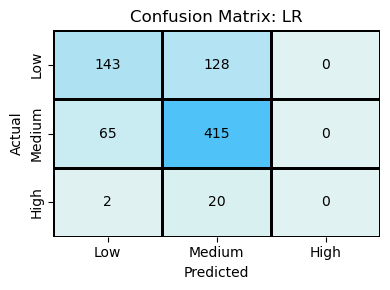

Training DTC...
Accuracy for DTC: 0.5977
Cohen's Kappa for DTC: 0.2076
              precision    recall  f1-score   support

         low       0.52      0.53      0.52       271
      medium       0.69      0.66      0.67       480
        high       0.07      0.14      0.10        22

    accuracy                           0.60       773
   macro avg       0.43      0.44      0.43       773
weighted avg       0.61      0.60      0.61       773

-------
ROC AUC for DTC: 0.5887
Log Loss for DTC: 14.5014


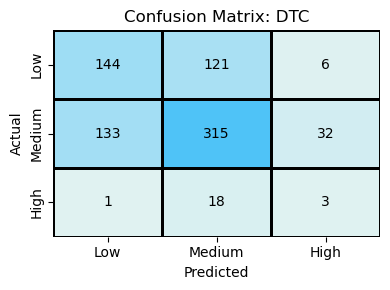

Training GNB...
Accuracy for GNB: 0.6882
Cohen's Kappa for GNB: 0.3276
              precision    recall  f1-score   support

         low       0.61      0.52      0.57       271
      medium       0.73      0.81      0.77       480
        high       0.00      0.00      0.00        22

    accuracy                           0.69       773
   macro avg       0.45      0.45      0.44       773
weighted avg       0.67      0.69      0.67       773

-------
ROC AUC for GNB: 0.7733
Log Loss for GNB: 0.6979


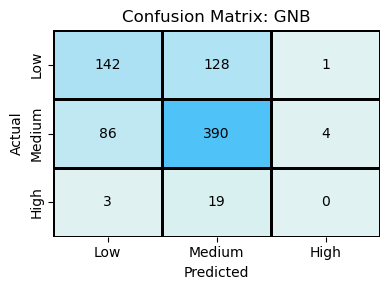

Training RF...
Accuracy for RF: 0.7167
Cohen's Kappa for RF: 0.3872
              precision    recall  f1-score   support

         low       0.66      0.58      0.61       271
      medium       0.74      0.83      0.78       480
        high       0.00      0.00      0.00        22

    accuracy                           0.72       773
   macro avg       0.47      0.47      0.47       773
weighted avg       0.69      0.72      0.70       773

-------
ROC AUC for RF: 0.8209
Log Loss for RF: 0.6243


/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.c

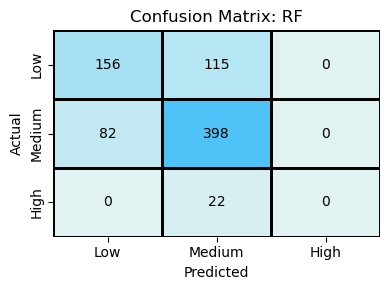

Training SVC...
Accuracy for SVC: 0.7309
Cohen's Kappa for SVC: 0.4030
              precision    recall  f1-score   support

         low       0.71      0.54      0.61       271
      medium       0.74      0.88      0.80       480
        high       0.00      0.00      0.00        22

    accuracy                           0.73       773
   macro avg       0.48      0.47      0.47       773
weighted avg       0.71      0.73      0.71       773

-------
ROC AUC for SVC: 0.8125
Log Loss for SVC: 0.6152


/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.c

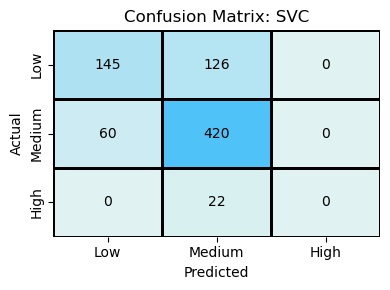

Training KNC...
Accuracy for KNC: 0.7063
Cohen's Kappa for KNC: 0.3736
              precision    recall  f1-score   support

         low       0.64      0.59      0.61       271
      medium       0.74      0.81      0.77       480
        high       0.00      0.00      0.00        22

    accuracy                           0.71       773
   macro avg       0.46      0.46      0.46       773
weighted avg       0.69      0.71      0.69       773

-------
ROC AUC for KNC: 0.7413
Log Loss for KNC: 2.2639


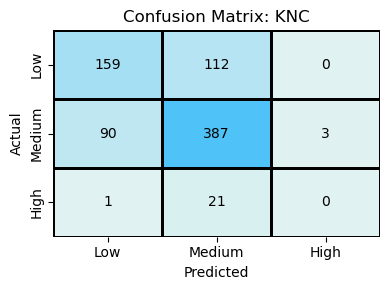

Training MLPC...
Accuracy for MLPC: 0.7309
Cohen's Kappa for MLPC: 0.4131
              precision    recall  f1-score   support

         low       0.69      0.58      0.63       271
      medium       0.75      0.85      0.80       480
        high       0.00      0.00      0.00        22

    accuracy                           0.73       773
   macro avg       0.48      0.48      0.47       773
weighted avg       0.71      0.73      0.71       773

-------
ROC AUC for MLPC: 0.8160
Log Loss for MLPC: 0.5966


/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-pa

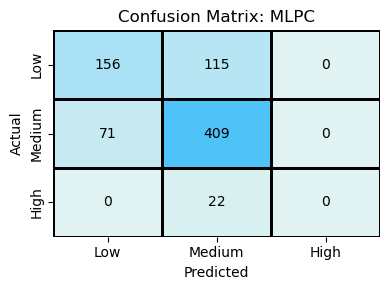

Summary of Cohen's Kappa scores:
LR has Fair agreement with a Kappa value of 0.38532578343732315
DTC has Fair agreement with a Kappa value of 0.2075558148657246
GNB has Fair agreement with a Kappa value of 0.32760288459456144
RF has Fair agreement with a Kappa value of 0.3871542296121724
SVC has Good agreement with a Kappa value of 0.4030311806158895
KNC has Fair agreement with a Kappa value of 0.37357066612402856
MLPC has Good agreement with a Kappa value of 0.41305141421958724
Summary of ROC AUC scores:
LR has a Good ROC AUC score of 0.6162
DTC has a Poor ROC AUC score of 14.5014 (high loss)
GNB has a Good ROC AUC score of 0.6979
RF has a Good ROC AUC score of 0.6243
SVC has a Good ROC AUC score of 0.6152
KNC has a Poor ROC AUC score of 2.2639 (high loss)
MLPC has a Good ROC AUC score of 0.5966
Summary of Log Loss scores:
LR has a Good Log Loss score of 0.7955
DTC has a Poor Log Loss score of 0.5887
GNB has a Good Log Loss score of 0.7733
RF has a Very Good Log Loss score of 0.8209
S

In [238]:
models = {
    'LR': LogisticRegression(random_state=42, max_iter=100),
    'DTC': DecisionTreeClassifier(random_state=42),
    'GNB': GaussianNB(),
    'RF': RandomForestClassifier(random_state=42),
    'SVC': SVC(probability=True, random_state=42),  # set probability=True for roc_auc_score
    'KNC': KNeighborsClassifier(),
    'MLPC': MLPClassifier(random_state=42, max_iter=300),
}

kappa_scores = {}
roc_auc_scores = {}
log_loss_scores = {}

print('=====================')

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(x_train, y_train)

    preds = model.predict(x_test)
    acc = accuracy_score(y_test, preds)
    kappa = cohen_kappa_score(y_test, preds)

    print(f"Accuracy for {name}: {acc:.4f}")
    print(f"Cohen's Kappa for {name}: {kappa:.4f}")
    print(classification_report(y_test, preds, target_names=["low", "medium", "high"]))
    print('-------')

    kappa_scores[name] = kappa

    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(x_test)
        try:
            roc_auc = roc_auc_score(y_test, probs, multi_class='ovr')
            print(f"ROC AUC for {name}: {roc_auc:.4f}")
            roc_auc_scores[name] = roc_auc
            loss = log_loss(y_test, probs)
            log_loss_scores[name] = loss
            print(f"Log Loss for {name}: {loss:.4f}")
        except Exception as e:
            print(f"Could not calculate ROC AUC and Log Loss for {name}: {e}")
    else:
        print(f"{name} does not support predict_proba, skipping ROC AUC.")

    print('=====================')
    
    cm = confusion_matrix(y_test, preds)
    cm_df = pd.DataFrame(cm, index=["Low", "Medium", "High"], columns=["Low", "Medium", "High"])
    
    light_blues = LinearSegmentedColormap.from_list("light_blues", ["#E0F2F1", "#4FC3F7"])


    plt.figure(figsize=(4, 3))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap=light_blues, cbar=False, linewidths=.8, linecolor='black', annot_kws={"color": "black"})
    plt.title(f'Confusion Matrix: {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()
    
    print('=====================')

print("Summary of Cohen's Kappa scores:")
for name, score in kappa_scores.items():
    if score < 0.20:
        print(f'{name} has Poor agreement with a Kappa value of {score}') 
    elif 0.20 <= score < 0.40:
        print(f'{name} has Fair agreement with a Kappa value of {score}') 
    elif 0.40 <= score < 0.60:
        print(f'{name} has Good agreement with a Kappa value of {score}')
    else:
        print(f'{name} has Very good agreement with a Kappa value of {score}') 


print('=====================')


print("Summary of ROC AUC scores:")
for name, score in log_loss_scores.items():
    if score > 1.0:
        print(f'{name} has a Poor ROC AUC score of {score:.4f} (high loss)')
    elif 0.75 < score <= 1.0:
        print(f'{name} has a Fair ROC AUC score of {score:.4f}')
    elif 0.5 < score <= 0.75:
        print(f'{name} has a Good ROC AUC score of {score:.4f}')
    elif 0.25 < score <= 0.5:
        print(f'{name} has a Very Good ROC AUC score of {score:.4f}')
    else:
        print(f'{name} has an Excellent ROC AUC score of {score:.4f} (low loss)')


print('=====================')


print("Summary of Log Loss scores:")
for name, score in roc_auc_scores.items():
    if score < 0.60:
        print(f'{name} has a Poor Log Loss score of {score:.4f}')
    elif 0.60 <= score < 0.70:
        print(f'{name} has a Fair Log Loss score of {score:.4f}')
    elif 0.70 <= score < 0.80:
        print(f'{name} has a Good Log Loss score of {score:.4f}')
    elif 0.80 <= score < 0.90:
        print(f'{name} has a Very Good Log Loss score of {score:.4f}')
    else:
        print(f'{name} has an Excellent Log Loss score of {score:.4f}')
        
print('=====================')


print("Final Thoughts:")
for name in models.keys():
    scoreroc = roc_auc_scores.get(name)
    scorekap = kappa_scores.get(name)
    scorelog = log_loss_scores.get(name)

    if scoreroc is not None and scorekap is not None and scorelog is not None:
        if scoreroc >= 0.80 and scorekap >= 0.60 and scorelog <= 0.5:
            print(f"{name} is an excellent choice.")
        elif scoreroc >= 0.70 and scorekap >= 0.40 and scorelog <= 0.75:
            print(f"{name} is a good choice.")
        else:
            print(f"{name} might not be reliable enough.")
    else:
        print(f"{name} is missing score data.")

    

# CV

I am using x_train and y_train instead of the whole dataset. 

In [239]:
RF = RandomForestClassifier(random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(RF, X, y, cv=cv, scoring='accuracy')
mean_score = scores.mean()
print(f"RF CV Accuracy Scores: {scores}")
print(f"RF CV Accuracy Mean: {mean_score: .4f}")

RF CV Accuracy Scores: [0.73997413 0.73221216 0.70633894 0.7309185  0.71927555]
RF CV Accuracy Mean:  0.7257


# Hyperparameter w/ CV Included

I am using x_train and y_train instead of the whole dataset. 

In [240]:
RF = RandomForestClassifier(random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

max_features_range = np.arange(1,6,1)
n_estimators_range = np.arange(10,210,10)
param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range)

rf = RandomForestClassifier()

grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv)

grid.fit(X, y)
print(grid.best_params_)
print("The best parameters are %s with a score of %0.4f" % (grid.best_params_, grid.best_score_))


{'max_features': np.int64(1), 'n_estimators': np.int64(200)}
The best parameters are {'max_features': np.int64(1), 'n_estimators': np.int64(200)} with a score of 0.7317


Previous Training RF...
Accuracy for RF: 0.7958